# SQL Challenge - Bonus

As you examine the data, you begin to suspect that the dataset is fake. Maybe, your boss gave you spurious data to test the data engineering skills of a new employee? To confirm your hunch, you decide to create a visualization of the data to present to your boss. To do so, complete the following steps:

#### 1) Import the SQL database into Pandas. (Although you could read the CSV files directly in Pandas, you’re trying to prove your technical resourcefulness.) Note that this step might require some research. Feel free to use the following code to get started (where <your_db_name> is your database name):

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import postgress_credentials
from db_credentials import postgress_credentials

In [2]:
postgres_connection = f'postgresql://localhost/Employee?{postgress_credentials}'
engine = create_engine(postgres_connection)
connection = engine.connect()

In [3]:
# Creating the Data Frame with the selected data to test database connectivity
sql_query = "SELECT * FROM employee"
data_employee = pd.read_sql(sql_query, connection)
data_employee.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


#### 2) Create a histogram to visualize the employee salary ranges that were the most common.

In [4]:
# Creating the Data Frame with the selected data to plot in the histogram
sql_query = "SELECT s.salary FROM salary AS s INNER JOIN employee AS e ON e.emp_no = s.emp_no"
data_salary_range = pd.read_sql(sql_query, connection)

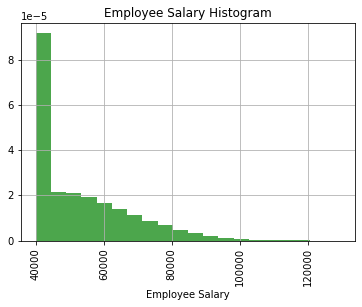

In [5]:
# Histogram to visualize the employee salary ranges that were the most common.
N, bins, patches = plt.hist(data_salary_range , bins=20 , density=True, facecolor='g', alpha=0.7)
plt.title("Employee Salary Histogram")
plt.xlabel("Employee Salary")
plt.xticks(rotation="vertical")
plt.grid()

#### 3) Create a bar chart of average salary by title.

In [6]:
# Creating the Data Frame with the selected data to plot in the bar chart of average salary by title
sql_query = "SELECT t.title, ROUND(AVG(s.salary),2) FROM title AS t INNER JOIN employee AS e ON t.title_id = e.emp_title_id INNER JOIN salary AS s ON s.emp_no = e.emp_no GROUP BY t.title"
data_title_salary = pd.read_sql("select t.title, round(avg(s.salary),2) from title as t inner join employee as e on t.title_id = e.emp_title_id inner join salary as s on s.emp_no = e.emp_no group by t.title", connection)

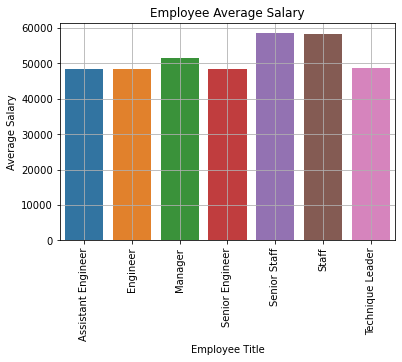

In [7]:
# Creating the plot using Matplotlib's pyplot methods
sns.barplot(x=data_title_salary["title"], y=data_title_salary["round"])
plt.title("Employee Average Salary")
plt.xlabel("Employee Title")
plt.ylabel("Average Salary")
plt.xticks(rotation="vertical")
plt.grid()